In [1]:
##################################################
#### July 2019
#################################################

###Import required libraries####################################
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import API key
from config import key

# import seaborn as sns
### importing modules for gmplots - plot og google map
import gmaps
import gmplot
### importing modules for plot on screen
from IPython.display import IFrame
from IPython.core.display import display
import os
import time
import seaborn as sns

In [5]:
def get_crime_dist_map(df, crime_types=[], start_date = '2001/01/01', end_date = '2019/05/31', key=''):

    print('Start reading the data file. This will take time, please wait....Started reading at=  ', time.asctime(time.localtime(time.time())) )
    #print('crime typpes=', crime_types, ' start_date=', start_date, '  end date=', end_date)
    #print("start date=", start_date, "end_date=", end_date, "key=", key)
    if start_date == None  or end_date == None or key == '':
        print(" No proper input from user. Please fix it- provide a Key, startdate and enddate correctly")
        return
    start_time = time.time()
    cols = list(df.columns.values)
    df1 = pd.DataFrame(columns=cols)   # empty data frame
    for i in crime_types:
        df2 = df.loc[df['Primary Type']== i, : ]
        df1 = df1.append(df2, ignore_index = True)
        
################ Selecting time line for the plots ##########################################
    df1 = df1.dropna()
    df1['Date'] = pd.to_datetime(df1['Date'])
    #print(df1.dtypes)
    #print(crime_data['Date'].dtype)
    mask = (df1['Date'] > pd.Timestamp(start_date)) & (df1['Date'] <= pd.Timestamp(end_date))
    df1 = df1.loc[mask]
    
    ################### PLotting part of the function#####################################
    lat_list=list(df1['Latitude'])
    lng_list=list(df1['Longitude'])
    
    gmap = gmplot.GoogleMapPlotter(41.881832, -87.623177, 13)
    # # API key
    gmap.apikey = key
    gmap.heatmap(lat_list,lng_list)

    ## Save html file
    gmap.draw("crime_data_google_plot.html")
    display(IFrame("crime_data_google_plot.html", '425px', '350px'))
    total_time = time.time() - start_time
    #print('total time=', total_time)
    print('Data has been read. Congratulations!...Data read end time= ', time.asctime( time.localtime(time.time())) )
    df1

    
############ This will plot the homicide in Chicago for 2016 - news articles state chicago had the most
### homicides in 2016 and this plot will support that.
def get_fact_check1(df, years, crime_types=[]):
    cols = list(df.columns.values)
    df1 = pd.DataFrame(columns=cols)   # empty data frame
    plt.figure(figsize = (15, 10))
    for crimetype in crime_types:
        df2=df.loc[(df['Primary Type']== crimetype) &  (df['Year' ] >= years[0]) & (df['Year' ] <= years[1]), : ]
        df1 = df1.append(df2, ignore_index = True)
    df1 = df1.dropna()
    
    plotdf=pd.DataFrame(df1.groupby("Year")['ID'].count())
    plotdf=plotdf.rename(columns={"Year": "Years", "ID": "Count"})
    y=list(plotdf['Count'])
    x=list(plotdf.index)
    plotdf.head(30)

    plotdf.plot.line()
    #plt.plot(x, y,color='red')
    plt.text(1, 0.6, "Note:\nPlot shows 2016 has the most homicides in Chicago", \
                       fontsize=14, transform=plt.gcf().transFigure)
    plt.xlabel("years")
    plt.ylabel("Homicide count")
    plt.title("Chicago homicide numbers- plot shows that 2016 was the worst year")
    plt.figure(figsize=(60,70))
    plt.show()

    
############## Using seaborn package to plot the location of the criminal activity
##############  Shows Street as an unsafe place. ####################################
def get_sns(df,years, crime_types=[]):
    
    cols = list(df.columns.values)
    df1 = pd.DataFrame(columns=cols)   # empty data frame
    plt.figure(figsize = (15, 10))
    for crimetype in crime_types:
        df2=df.loc[(df['Primary Type']== crimetype) &  (df['Year' ] >= years[0]) & (df['Year' ] <= years[1]), : ]
        df1 = df1.append(df2, ignore_index = True)
    df1 = df1.dropna()
                   
    sns.countplot(y= 'Location Description', data = df1, order = \
              df1['Location Description'].value_counts().iloc[:18].index) 
    df.head()
    
    
####################### plots crimes on google heat maps #####################################    
def demo_crime_dist_map():
    import webbrowser
    import time
    time.sleep(10)
    webbrowser.open_new_tab('crime_data_google_plot.html')

read data frame
Start reading the data file. This will take time, please wait....Started reading at=   Fri Jul 12 19:45:39 2019


Data has been read. Congratulations!...Data read end time=  Fri Jul 12 20:00:00 2019


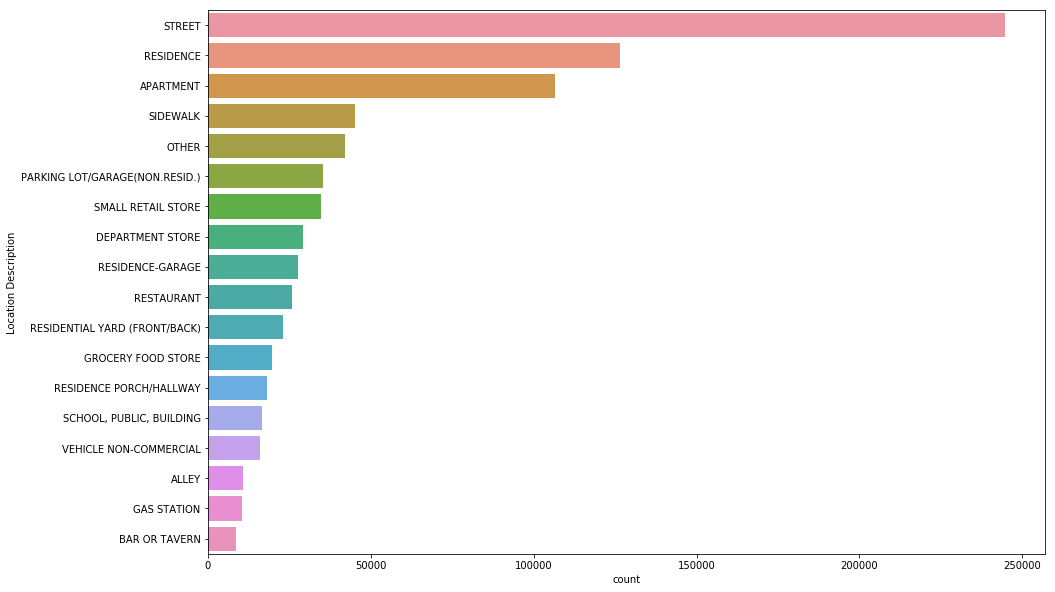

<Figure size 1080x720 with 0 Axes>

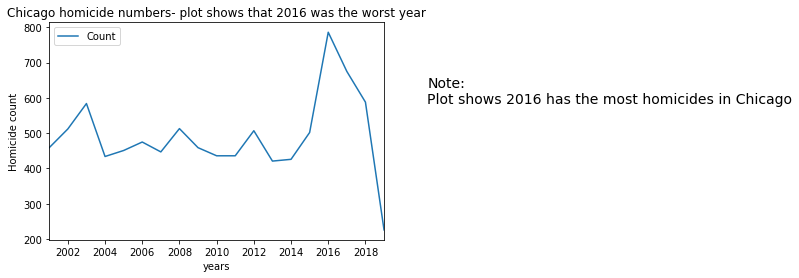

<Figure size 4320x5040 with 0 Axes>

In [6]:
if __name__ == '__main__':

    file = os.path.join('Resources','Crimes_2001_to_present.csv')
    crime_df = pd.read_csv(file)
    print('read data frame')
    get_crime_dist_map(df=crime_df, crime_types=['ASSAULT', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'Primary Type'],
                       start_date = '07-01-2016', end_date ='04-01-2019', key=key)
    get_sns(crime_df, years=[2011, 2019],\
            crime_types=['ASSAULT', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'HOMICIDE', 'THEFT', 'CRIM SEXUAL ASSAULT'])
    get_fact_check1(crime_df, years=[2001, 2019], crime_types=['HOMICIDE'])

In [7]:
if __name__ == '__main__':
    demo_crime_dist_map() 